# Series de Tempo I: Estacionariedade, Determinismo e Estocasticidade

Usamos test e metodos para provar estacionariade e determinismo de uma serie temporal, e comparamos os resultados com uma serie random de distribuição uniforme.



In [120]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from scipy.ndimage.interpolation import shift

In [3]:
# Versões dos pacotes usados no notebook

%reload_ext watermark
%watermark -a "César S. Hooper/ Março 2022" --iversions
!python --version

Author: César S. Hooper/ Março 2022

cv2       : 4.5.4-dev
pandas    : 1.2.4
matplotlib: 3.3.4
numpy     : 1.19.5

Python 3.8.8


In [4]:
# paths 
path = 'C:.... Doc_csv'

# crea lista con nombre de las empresas
empresas = os.listdir(path)

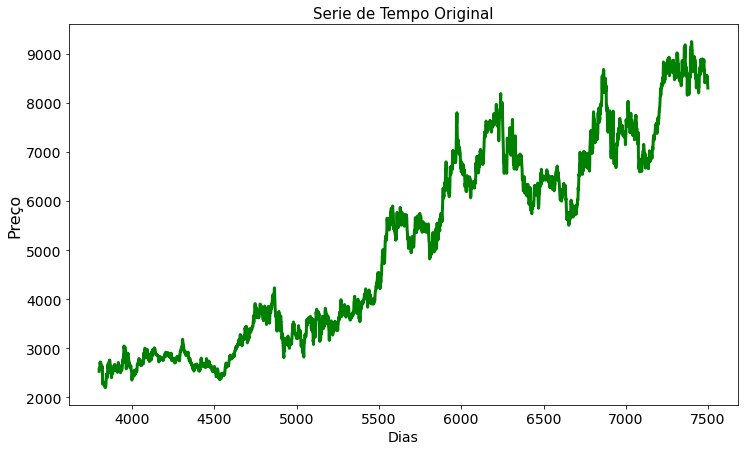

In [49]:
ccu_close['close'].plot(color=cores, linewidth=3, figsize=(12, 7))
plt.title('Serie de Tempo Original', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Dias', fontsize=14)
plt.ylabel('Preço', fontsize=16)
plt.show()

### Estacionariedad
As **Series de Tempo (ST)** estacionârias tem media, variança e autocorrelação que não mudam com o decorrer do tempo.

O test de a-Fuller é um  

<AxesSubplot:>

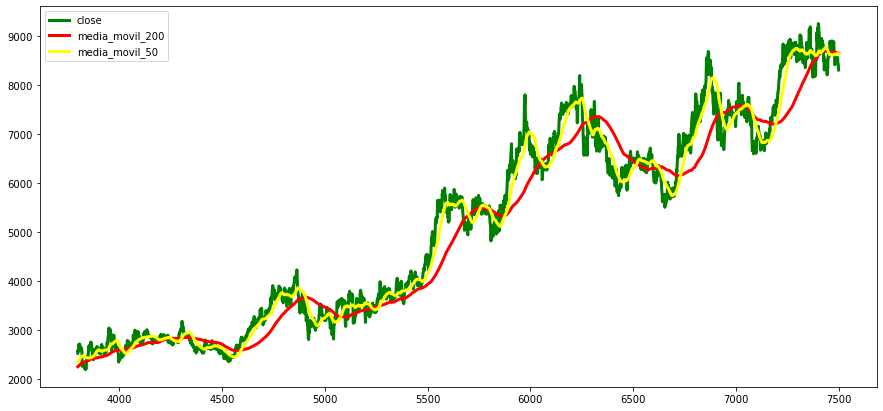

In [33]:
cores = ['green', 'red', 'yellow']
ccu_close.plot(color=cores, linewidth=3, figsize=(15, 7))

<AxesSubplot:>

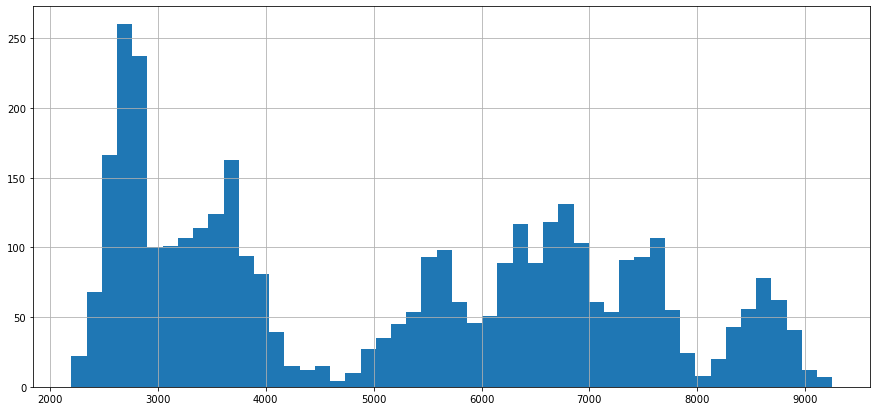

In [80]:
ccu_close.close.hist(bins=50, figsize=(15, 7))

In [82]:
# ad-fuller teste
result = adfuller(ccu_close.close)
print('ADF estadistica: %f' % result[0])
print('p-value: %f' % result[1])
print('Valores criticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF estadistica: -0.769579
p-value: 0.827895
Valores criticos:
	1%: -3.432
	5%: -2.862
	10%: -2.567


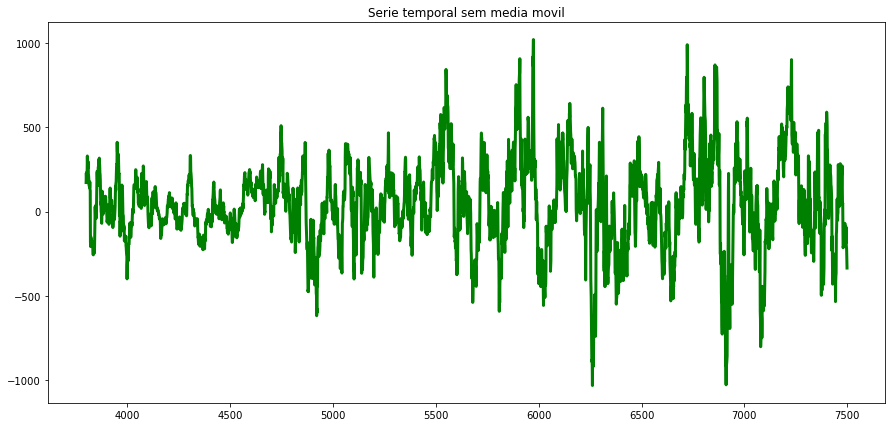

In [336]:
# vamos restar a media movel da serie de tempo original
ccu_trans = ccu_close.close - ccu_close.media_movil_50
ccu_trans_mv = ccu_trans.rolling(window=50).mean()
ccu_trans.plot(color = 'green', linewidth = 3, figsize=(15, 7))
plt.title('Serie temporal sem media movil')
plt.show()

In [84]:
# ad-fuller teste
result = adfuller(ccu_trans)
print('ADF estadistica: %f' % result[0])
print('p-value: %.25f' % result[1])
print('Valores criticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF estadistica: -9.792640
p-value: 0.0000000000000000629381994
Valores criticos:
	1%: -3.432
	5%: -2.862
	10%: -2.567


<AxesSubplot:>

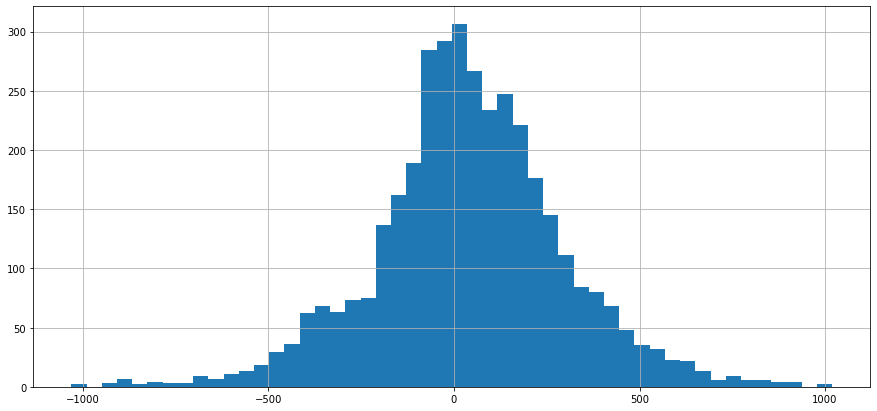

In [92]:
ccu_trans.hist(bins=50, figsize=(15, 7))

A serie agora é estacionária, com media movil que não muda no tempo, e distribuição normal. 

## Determinismo e Estocasticidade em series temporais

Uma serie temporal é estocástica se os dados não estão relacionados entre eles. Em outras palavras, se os dados não conservam história. Por exemplo, o lançamento de uma moeda é um processo estocástico porque os resultados não dependem dos resultados anteriores. Da mesma forma, lançar um dado é um processo cujos resultados não dependem dos anteriores, são independentes um do outro. Assim, em um processo estocástico o resultado atual não determina de forma alguma o próximo resultado. 

Por outro lado, uma serie temporal é determinista se os dados conservam algum tipo de relação um do outro: o resultado atual depende do anterior e determina o próximo.

Assim, para fazer previsões com series temporais é importante identificar se a serie é determinista ou estocástica, porque a metodología é diferente. Vamos usar duas métricas para medir a correlação dos dados, e diferenciar uma serie determinista de uma estocástica

A primeira métrica é autocorrelação lineal. 

Vamos criar uma serie random para fazer comparações. 

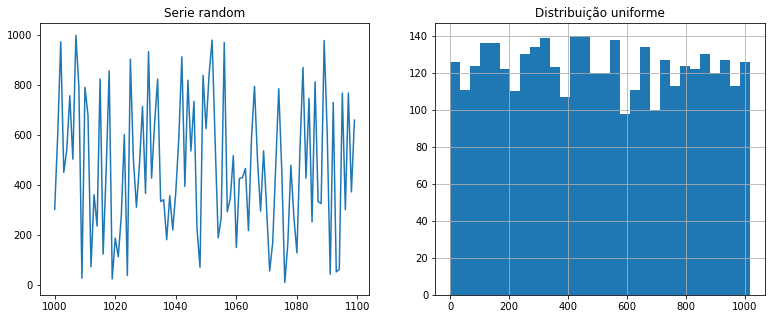

In [338]:
# serie random com distribuição uniforme
sr = pd.Series(max(ccu_trans)*np.random.rand(len(ccu_trans)))
plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.plot(sr[1000:1100])
plt.title('Serie random')
plt.subplot(1, 2, 2)
sr.hist(bins=30)
plt.title('Distribuição uniforme')
plt.show()

Graficamos a serie random no tempo $t$ vs o tempo $(t+m)$

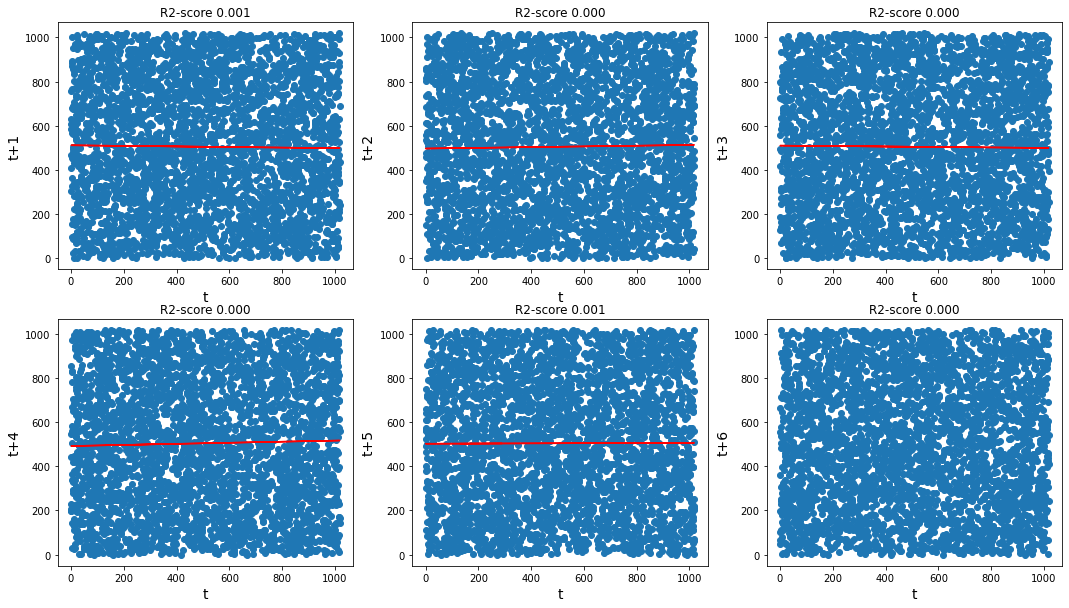

In [339]:
plt.figure(figsize=(18, 10))
for k in range(1, 7):
    x = pd.DataFrame(columns=['x'])
    x['x'] = sr
    x['shift'] = x.shift(-k)
    x = x.dropna()
    
    r2, yest = least_squared(x['x'], x['shift'])
    
    plt.subplot(2, 3, k)
    plt.scatter(x=x['x'] , y=x['shift'])
    plt.title('R2-score %.3f'%r2)
    plt.xlabel('t', fontsize=14)
    plt.ylabel(('t+'+str(k)), fontsize=14)

Os dados em $(t+m)$ não têm correlação com os dados e em $t$

Vamos ver os dados da nossa serie temporal

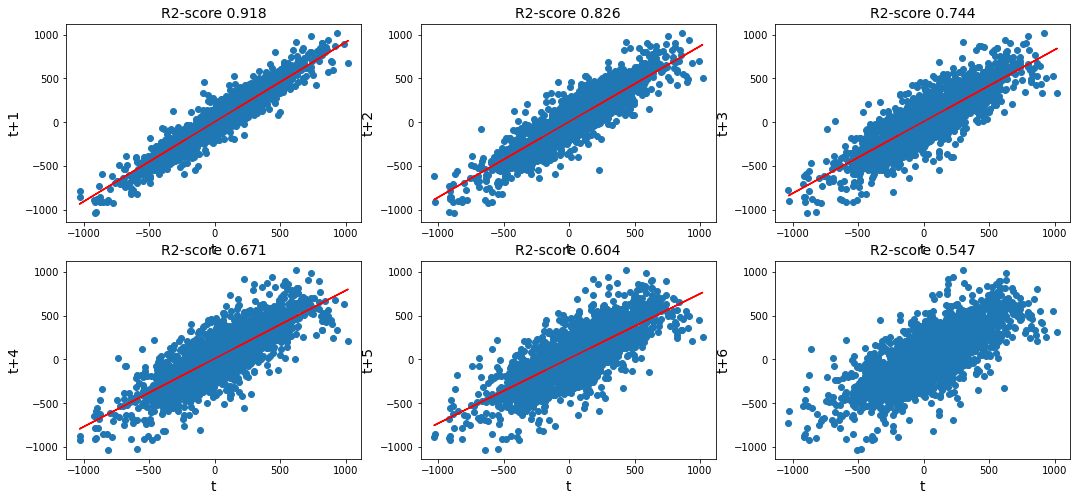

In [248]:
plt.figure(figsize=(18, 8))
for k in range(1, 7):
    x = pd.DataFrame(columns=['x'])
    x['x'] = ccu_trans
    x['shift'] = x.shift(-k)
    x = x.dropna()
    
    r2, yest = least_squared(x['x'], x['shift'])
    
    plt.subplot(2, 3, k)
    plt.scatter(x=x['x'] , y=x['shift'])
    plt.title('R2-score %.3f'%r2, fontsize=14)
    plt.xlabel('t', fontsize=14)
    plt.ylabel('t+'+str(k), fontsize=14)

Esses dados têm, claramente, maior correlação. O R2-score está mais perto de 1 do que no caso da serie random.

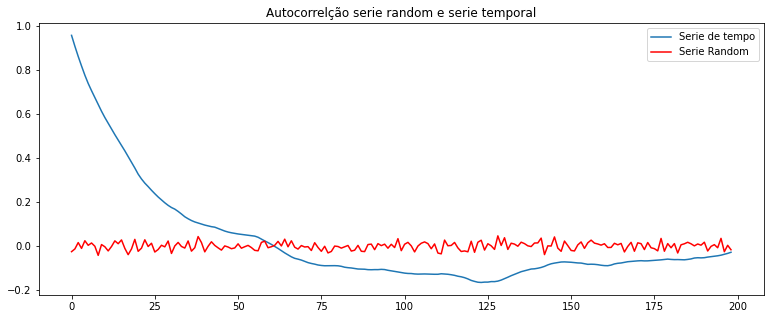

In [350]:
autoc_sr = []
autoc_ccu = []
for k in range(1, 200):
    
    x_sr = np.array(sr)
    x_ccu = np.array(ccu_trans)
    autoc_sr.append(pd.Series(x_sr).autocorr(lag=k))
    autoc_ccu.append(pd.Series(x_ccu).autocorr(lag=k))
    
plt.figure(figsize=(13, 5))
plt.plot(autoc_ccu)
plt.plot(autoc_sr, 'r')
plt.title('Autocorrelção serie random e serie temporal')
plt.legend(labels=['Serie de tempo','Serie Random'], loc='best')
plt.show()

Dados random não tem correlação lineal.

## Informação Mutua

Uma das limitações da autocorrelação é que enntrega apenas a relação lineal da variavel consigo mesma.

A informação mutua entrega relação não lineal da serie temporal. É baseada na entropia de Shannon. A informação mutual mede a quantidade de informação que uma variável entrega da outra. 

<img src="mutual_information.png" style="width:400px;height:200px"/>

Em essa imagem a Informação mutua está representada por $I(x;y)$.  $H(x)$ e $H(y)$ repsenentam a entropia das variaveis X e Y independentemente, e $H(x,y)$ a entropia conjunta. Se duas variáveis são independentes não há informação mutua.

In [344]:
# informação mutua da serie random
mu_inf_sr = mutual_information(sr)


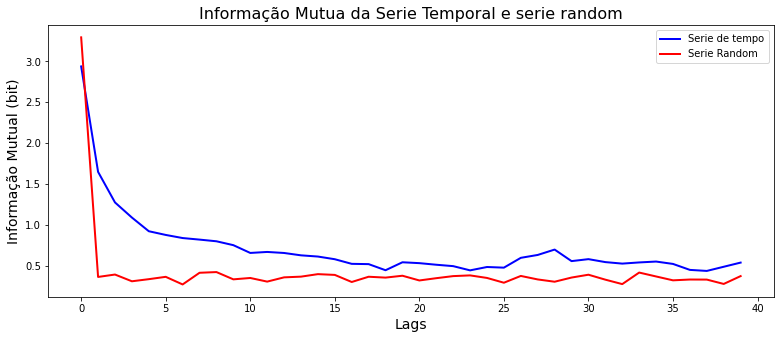

In [349]:
m = mutual_information(ccu_trans)
plt.figure(figsize=(13, 5))
plt.plot(m[0:40] , 'b', linewidth=2)
plt.plot(mu_inf_sr[0:40], 'r', linewidth=2)
plt.xlabel('Lags', fontsize=14)
plt.ylabel('Informação Mutual (bit)', fontsize=14)
plt.title('Informação Mutua da Serie Temporal e serie random', fontsize=16)
plt.legend(labels=['Serie de tempo','Serie Random'], loc='best')
plt.show()

## Conclusão

A serie temporal é determinista, por tanto, é posível fazer previsões e é estacionaria.

## Apêndice
Funções utilizadas em este notebook

In [317]:
def least_squared(datox, datoy):
    
    # retorna R2 score y gráfico futuro vs prediccion
    
    # datox: es el dato original futuro
    # datoy: es la prediccion del futuro
    
    datox = np.array(datox)
    datoy = np.array(datoy)
    
    promx = datox.mean()
    promy = datoy.mean()

    a = sum(datox*(datoy - promy))/sum(datox*(datox - promx))
    b = promy - a*promx
    
    # la mejor funcion teorica
    y_est = a*datox + b
    
    R2 = sum((y_est - promy)**2)/sum((datox - promy)**2)
    
    #plt.scatter(datox, datoy)
    plt.plot(datox, y_est, 'r')

    return R2, y_est

In [343]:
def mutual_information(dados):
    
    bins = 10
    mutual = []
    T = 200
    
    data = dados
    
    for n in range(0, np.int(T/2)):
        
        y = data[n:n+T]
        x = data[0:T]

        hx = np.histogram(x, bins)
        px = hx[0]/hx[0].sum()

        hy = np.histogram(y, bins)
        py = hy[0]/hy[0].sum()

        h = np.histogram2d(x, y, bins)
        pxy = h[0]/h[0].sum()
        
        # informação variável X
        ix = [0 if k==0 else -np.log2(k)*k for k in px]
        ix = sum(ix)

        # informação variável Y
        iy = [0 if k==0 else -np.log2(k)*k for k in py]
        iy = sum(iy)

        # informação conjunta das variáveis X e Y
        ixy = [0 if k == 0 else -np.log2(k)*k for k in pxy.reshape(1,-1)[0]]
        ixy = sum(ixy)
        
        mutual.append(ix + iy - ixy)

    return mutual